## Supervised Machine learning

- ### break down the step-by-step process

In [17]:
import  numpy as np
import pandas as pd

In [18]:
df=pd.read_csv('insurance.csv')

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- ### convert columns  categorical -> numerical

In [21]:
df=pd.get_dummies(df,columns=['sex','smoker','region'])

In [22]:
df.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,True,False,False,True,False,False,False,True
1,18,33.77,1,1725.5523,False,True,True,False,False,False,True,False


In [23]:
x=df.drop(columns='charges')
y=df['charges']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Used the ML Model LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=lr.predict(x_test)

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_test,y_pred)

0.7835929767120723

# supervised ml types 
- ## Lasso
- ## Ridge 

In [32]:
from sklearn.linear_model import Lasso, Ridge

In [33]:
ls=Lasso()

In [34]:
ls.fit(x_train,y_train)

Lasso()

In [35]:
y_pred_lasso=ls.predict(x_test)

In [36]:
r2_score(y_test,y_pred_lasso)

0.7835348987579266

- **Ridge**

In [37]:
ri =Ridge()

In [38]:
ri.fit(x_train,y_train)

Ridge()

In [39]:
y_pred_ridge=ri.predict(x_test)

In [40]:
r2_score(y_test,y_pred_ridge)

0.7834446266673822

# **Logistics_regressions**

In [105]:
df=pd.read_csv('covid_toy.csv')

In [106]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


- ### missing values

In [107]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

-  ### **To reduce the missing value using simple imputer**

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
si=SimpleImputer()

In [110]:
df['fever']=si.fit_transform(df[['fever']])

In [111]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

- ### **To convert Categorical columns-> Numerical columns**

In [112]:
df = pd.get_dummies(df, columns=['gender', 'cough', 'city'])


In [113]:
df.head()

,age,fever,has_covid,gender_Female,gender_Male,cough_Mild,cough_Strong,city_Bangalore,city_Delhi,city_Kolkata,city_Mumbai
0,60,103.0,No,False,True,True,False,False,False,True,False
1,27,100.0,Yes,False,True,True,False,False,True,False,False
2,42,101.0,No,False,True,True,False,False,True,False,False
3,31,98.0,No,True,False,True,False,False,False,True,False
4,65,101.0,No,True,False,True,False,False,False,False,True


In [114]:
# df['has_covid'].value_counts()

In [115]:
# df['has_covid'] =df['has_covid'].map({'Yes':1,'No':0})

- **divides data in train, test**

In [116]:
x=df.drop(columns=['has_covid'])
y=df['has_covid']

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.preprocessing import StandardScaler


In [120]:
ss=StandardScaler()

In [121]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
loR=LogisticRegression()

In [124]:
loR.fit(x_train,y_train)

LogisticRegression()

In [125]:
y_pred=loR.predict(x_test)

In [126]:
r2_score(y_test,y_pred)

ValueError: could not convert string to float: 'No'

In [ ]:
# print("Feature Coefficients:", loR.coef_)

- ###  DecisionTreeClassifier

In [127]:
df=pd.read_csv('insurance.csv')

In [128]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
df=pd.get_dummies(df,columns=['sex','smoker','region'])

In [130]:
df=df.astype(int)

In [131]:
x=df.drop(columns='charges')
y=df['charges']

In [132]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dtc=DecisionTreeClassifier()

In [135]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
y_pred=dtc.predict(x_test)

In [137]:
from sklearn.metrics import r2_score

In [138]:
r2_score(y_test,y_pred)

0.4942478394317523

 # **standardization in machine learning**
 - Standardization in machine learning is a data preprocessing technique that transforms numerical features to
 -  have a mean of 0 and a standard deviation of 1

In [229]:
import numpy as np
import pandas as pd

In [230]:
df=pd.read_csv('insurance.csv')

In [231]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [232]:
missin=(df.isnull().sum()/len(df)*100)
missin

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

- ### convet categorical to numerical


In [233]:
# df=pd.get_dummies(df,columns=['sex','smoker','region'])

- ## Transform data 

In [234]:
from sklearn.preprocessing import LabelEncoder


In [235]:
lb= LabelEncoder()

In [236]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [237]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [238]:
lb.fit(['sex','smoker','region'])

LabelEncoder()

In [239]:
encoding=lb.transform(['sex','smoker','region'])

In [240]:
encoding

array([1, 2, 0])

In [241]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [251]:
df=pd.get_dummies(df,columns=['sex','smoker','region'])

In [252]:
df.head(2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,True,False,False,True,False,False,False,True
1,18,33.77,1,1725.5523,False,True,True,False,False,False,True,False


## - divide into the traing and testing data 

In [253]:
x=df.drop(columns=['bmi'])
y=df['bmi']

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
sc=StandardScaler()

In [258]:
x_train_sc=sc.fit_transform(x_train)

In [259]:
# print(x_train_sc.shape)
# print(len(x_train.columns))

In [260]:
x_train_new = pd.DataFrame(x_train_sc, columns=x_train.columns)

In [261]:
np.round(x_train_new.describe(),2)

,age,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.52,-0.91,-1.02,-0.98,-1.02,-1.97,-0.51,-0.58,-0.56,-0.60,-0.57
25%,-0.88,-0.91,-0.70,-0.98,-1.02,0.51,-0.51,-0.58,-0.56,-0.60,-0.57
50%,0.01,-0.09,-0.31,-0.98,0.98,0.51,-0.51,-0.58,-0.56,-0.60,-0.57
75%,0.83,0.73,0.28,1.02,0.98,0.51,-0.51,-0.58,-0.56,1.67,-0.57
max,1.75,3.20,4.10,1.02,0.98,0.51,1.97,1.73,1.78,1.67,1.75


# **Normalization process in ml**

In [262]:
df=pd.read_csv('Social_Network_Ads.csv')

In [151]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [161]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [162]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [163]:
df['Gender']

0      0
1      0
2      1
3      1
4      0
      ..
395    1
396    0
397    1
398    0
399    1
Name: Gender, Length: 400, dtype: int64

In [164]:
x=df.drop(columns=['EstimatedSalary'])
y=df['EstimatedSalary']

In [165]:
from sklearn.model_selection import train_test_split


In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [167]:
np.round(x_train.describe(),2)

,User ID,Gender,Age,Purchased
count,320.00,320.0,320.00,320.00
mean,15689066.37,0.5,37.87,0.36
std,71974.25,0.5,10.21,0.48
min,15569641.00,0.0,18.00,0.00
25%,15622771.00,0.0,30.00,0.00
50%,15689969.50,0.5,37.00,0.00
75%,15747470.00,1.0,45.00,1.00
max,15815236.00,1.0,60.00,1.00


In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
mn=MinMaxScaler()

In [170]:
x_train_mn=mn.fit_transform(x_train)

In [173]:
x_train_new = pd.DataFrame(x_train_mn, columns=x_train.columns)

In [174]:
np.round(x_train_new.describe(),2)

,User ID,Gender,Age,Purchased
count,320.00,320.0,320.00,320.00
mean,0.49,0.5,0.47,0.36
std,0.29,0.5,0.24,0.48
min,0.00,0.0,0.00,0.00
25%,0.22,0.0,0.29,0.00
50%,0.49,0.5,0.45,0.00
75%,0.72,1.0,0.64,1.00
max,1.00,1.0,1.00,1.00


# Outliers in ml
- #### data points that significantly differ from other observations in a dataset

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
df=pd.read_csv('placement.csv')

In [303]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1


In [304]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [305]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

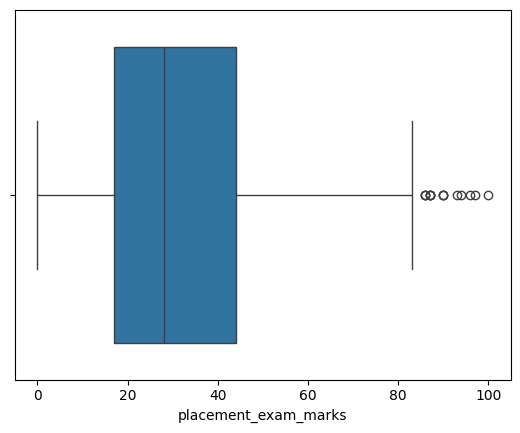

In [306]:
sns.boxplot(x=df['placement_exam_marks'])

- ## Finding IRQ

In [307]:
percentile25= df['placement_exam_marks'].quantile(0.25)
percentile75= df['placement_exam_marks'].quantile(0.75)


In [308]:
percentile25


np.float64(17.0)

In [309]:
percentile75

np.float64(44.0)

In [310]:
IQR=percentile75-percentile25

- ### upper limit and lower limit in bound the data ( made the boundaries )

In [311]:
upper_limit=percentile75+1.5*IQR

In [312]:
upper_limit

np.float64(84.5)

In [313]:
lower_limit=percentile25-1.5*IQR

In [314]:
lower_limit

np.float64(-23.5)

- ### Finding the outlers , upper_limit, lower_limit range

In [315]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [316]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


- ### Triming outlier Removing 

In [317]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [318]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [319]:
plt.figure(figsize=(5,5,))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Axes: >

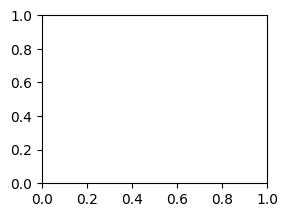

In [320]:
plt.subplot(222)

<Axes: xlabel='placement_exam_marks'>

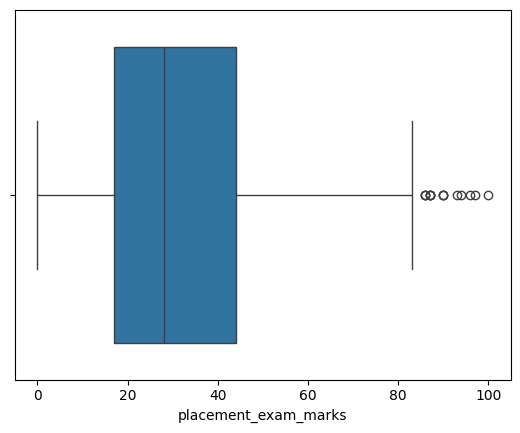

In [321]:
sns.boxplot(x=df['placement_exam_marks'])

<Axes: >

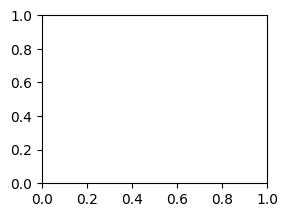

In [322]:
plt.subplot(224)

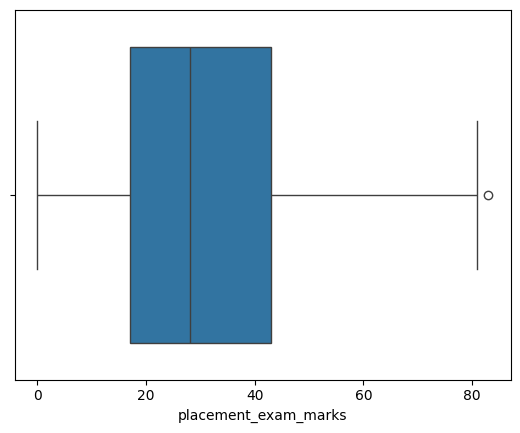

In [323]:
sns.boxplot(x=new_df['placement_exam_marks'])
plt.show()

In [345]:
new_df_cp=df.copy()

In [346]:
print(new_df_cp.head())

   cgpa  placement_exam_marks  placed
0  7.19                    26       1
1  7.46                    38       1
2  7.54                    40       1
3  6.42                     8       1
4  7.23                    17       0


In [347]:
new_df_cp['placement_exam_marks']=np.where(
    new_df_cp['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
    new_df_cp['placement_exam_marks'] < lower_limit,
    lower_limit,
    new_df_cp['placement_exam_marks']))

In [348]:
new_df_cp.shape

(1000, 3)

## Comparison with outliers and without outliers

In [350]:
plt.figure(figsize=(5,8))

<Figure size 500x800 with 0 Axes>

<Figure size 500x800 with 0 Axes>

<Axes: >

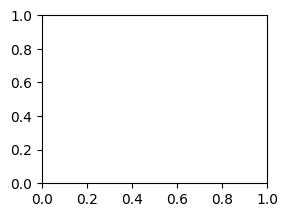

In [351]:
plt.subplot(222)

<Axes: xlabel='placement_exam_marks'>

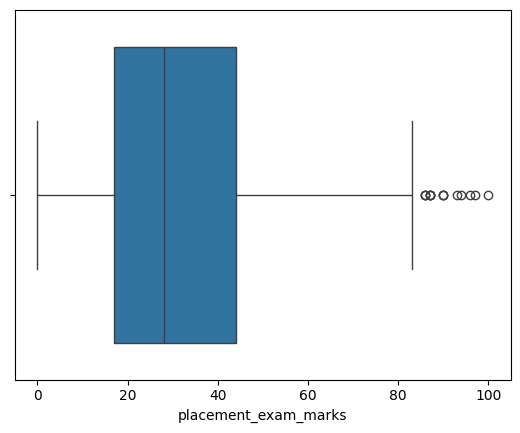

In [352]:
sns.boxplot(x=df['placement_exam_marks'])

In [353]:
plt.show(224)

<Axes: xlabel='placement_exam_marks'>

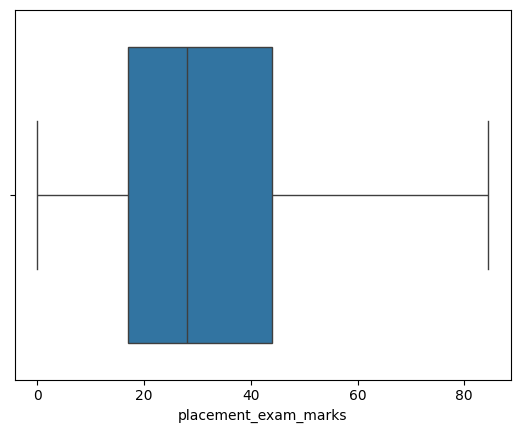

In [356]:
sns.boxplot(x=new_df_cp['placement_exam_marks'])

# CCA -> complete case analysis 
- ### Complete Case Analysis (CCA) is a straightforward method for handling missing data by removing rows with missing values.